# Caso practicoÑRandom Forest
 
En este caso de uso practico pretende resolver un problema de deteccion de Malware en dipocitivos Android mediante el analisis del trafico 
de red que genera el dipocitivo mediante el uso de subconjuntos de Arboles de decision.

###  Detecion de Malware en Android 
### Descripcion
Android adware and general malware dataset (CIC-AAGM2017)
The sophisticated and advanced Android malware is able to identify the presence of the emulator used by the malware analyst and in response, alter its behaviour to evade detection. To overcome this issue, we installed the Android applications on the real device and captured its network traffic. 

CICAAGM dataset is captured by installing the Android apps on the real smartphones semi-automated.
The dataset is generated from 1,900 applications with the following three categories:

1. Adware (250 apps)
Airpush: Designed to deliver unsolicited advertisements to the user’s systems for information stealing.

Dowgin: Designed as an advertisement library that can also steal the user’s information.

Kemoge: Designed to take over a user’s Android device. This adware is a hybrid of botnet and disguises
itself as popular apps via repackaging.

Mobidash: Designed to display ads and to compromise user’s personal information.

Shuanet: Similar to Kemoge, Shuanet is also designed to take over a user’s device.

2. General Malware (150 apps)
AVpass: Designed to be distributed in the guise of a Clock app.

FakeAV: Designed as a scam that tricks user to purchase a full version of the software in order to re-mediate non-existing
    infections.

FakeFlash/FakePlayer: Designed as a fake Flash app in order to direct users to a website (after successfully installed).

GGtracker: Designed for SMS fraud (sends SMS messages to a premium-rate number) and information stealing.

Penetho: Designed as a fake service (hacktool for Android devices that can be used to crack the WiFi password).
The malware is also able to infect the user’s computer via infected email attachment, fake updates, external media and infected documents.

3. Benign (1,500 apps)
2015 GooglePlay market (top free popular and top free new)

2016 GooglePlay market (top free popular and top free new)

License
The CICAAGM dataset consists of the following items is publicly available for researchers.

.pcap files – the network traffic of both the malware and benign (20% malware and 80% benign)

.csv files - the list of extracted network traffic features generated by the CIC-flowmeter

If you are using our dataset, you should cite our related paper that outlines the details of
the dataset and its underlying principles:

Arash Habibi Lashkari, Andi Fitriah A. Kadir, Hugo Gonzalez, Kenneth Fon Mbah and Ali A. Ghorbani, 
“Towards a Network-Based Framework for Android Malware Detection and Characterization”, In the proceeding of the
15th International Conference on Privacy, Security and Trust, PST, Calgary, Canada, 2017.

## Imports 


In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score 

# Funciones Auxiliares

In [5]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [6]:
def remove_labels(df, label_name):
    X = df.drop(df_name, axis=1)
    y =df[label_name].copy()
    return (X, y)


In [7]:
 def evaluate_resuit(y_pred, y, y_prep_pred, y_prep, metric):
    print(metric.__name__,"WITHOUT preparation:", metric(y_pred, y, avarange='weighted'))
    print(metric.__name__,"WITH preparation:", metric(y_prep_prep, y_pred, avarange='weighted'))

## 1.- Lectura  del DataSet 

In [9]:
df = pd.read_csv("datasets/TotalFeatures-ISCXFlowMeter.csv")

## 2.- Visualizacion del DataSet

In [11]:
df.head(10)

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,1020586,668,1641,35692,2276876,52,52,679,1390,53.431138,...,0.0,-1,0.0,2,4194240,1853440,1640,668,32,benign
1,80794,1,1,75,124,75,124,75,124,75.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
2,998,3,0,187,0,52,-1,83,-1,62.333333,...,0.0,-1,0.0,4,101888,-1,0,3,32,benign
3,189868,9,9,1448,6200,52,52,706,1390,160.888889,...,0.0,-1,0.0,2,4194240,2722560,8,9,32,benign
4,110577,4,6,528,1422,52,52,331,1005,132.000000,...,0.0,-1,0.0,2,155136,31232,5,4,32,benign
5,261876,7,6,1618,882,52,52,730,477,231.142857,...,0.0,-1,0.0,2,4194240,926720,3,7,32,benign
6,14,2,0,104,0,52,-1,52,-1,52.000000,...,0.0,-1,0.0,3,5824,-1,0,2,32,benign
7,29675,1,1,71,213,71,213,71,213,71.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
8,806635,4,0,239,0,52,-1,83,-1,59.750000,...,0.0,-1,0.0,5,107008,-1,0,4,32,benign
9,56620,3,2,1074,719,52,52,592,667,358.000000,...,0.0,-1,0.0,3,128512,10816,1,3,32,benign


In [12]:
df.describe()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,min_idle,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward
count,6.319550e+05,631955.000000,631955.000000,6.319550e+05,6.319550e+05,631955.000000,631955.000000,631955.000000,631955.000000,631955.000000,...,6.319550e+05,6.319550e+05,6.319550e+05,6.319550e+05,631955.000000,6.319550e+05,6.319550e+05,631955.000000,631955.00000,631955.000000
mean,2.195245e+07,6.728514,10.431934,9.540172e+02,1.206042e+04,141.475727,44.357688,263.675901,183.248084,174.959706,...,1.997327e+07,2.031228e+07,2.075238e+07,4.663875e+05,2.360896,9.620796e+05,3.104519e+05,9.733144,6.72471,19.965713
std,1.900578e+08,174.161354,349.424019,8.235040e+04,4.824716e+05,157.680880,89.099554,289.644383,371.863224,162.024811,...,1.897986e+08,1.897902e+08,1.899721e+08,6.199704e+06,3.041810,1.705655e+06,6.647956e+05,347.877923,174.13813,14.914261
min,-1.800000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,0.000000,0.00000,0.000000
25%,0.000000e+00,1.000000,0.000000,6.900000e+01,0.000000e+00,52.000000,-1.000000,52.000000,-1.000000,52.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000,0.000000e+00,-1.000000e+00,0.000000,1.00000,0.000000
50%,2.445000e+04,1.000000,0.000000,1.840000e+02,0.000000e+00,52.000000,-1.000000,83.000000,-1.000000,83.000000,...,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,2.000000,8.761600e+04,-1.000000e+00,0.000000,1.00000,32.000000
75%,1.759751e+06,3.000000,1.000000,4.270000e+02,1.670000e+02,108.000000,52.000000,421.000000,115.000000,356.000000,...,1.013498e+06,1.291379e+06,1.306116e+06,0.000000e+00,2.000000,3.046400e+05,9.049600e+04,1.000000,3.00000,32.000000
max,4.431076e+10,48255.000000,74768.000000,4.049644e+07,1.039222e+08,1390.000000,1390.000000,1500.000000,1390.000000,1390.000000,...,4.431072e+10,4.430000e+10,4.431072e+10,8.470000e+08,2269.000000,4.194240e+06,4.194240e+06,74524.000000,48255.00000,44.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631955 entries, 0 to 631954
Data columns (total 80 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 631955 non-null  int64  
 1   total_fpackets           631955 non-null  int64  
 2   total_bpackets           631955 non-null  int64  
 3   total_fpktl              631955 non-null  int64  
 4   total_bpktl              631955 non-null  int64  
 5   min_fpktl                631955 non-null  int64  
 6   min_bpktl                631955 non-null  int64  
 7   max_fpktl                631955 non-null  int64  
 8   max_bpktl                631955 non-null  int64  
 9   mean_fpktl               631955 non-null  float64
 10  mean_bpktl               631955 non-null  float64
 11  std_fpktl                631955 non-null  float64
 12  std_bpktl                631955 non-null  float64
 13  total_fiat               631955 non-null  int64  
 14  tota

In [14]:
print("Longunro del conjunto de Datos DataSet", len(df))
print("Numero de caracteristicas del DataSet", len(df.columns))

Longunro del conjunto de Datos DataSet 631955
Numero de caracteristicas del DataSet 80


In [15]:
df["calss"].value_counts()

calss
benign            471597
asware            155613
GeneralMalware      4745
Name: count, dtype: int64

## Buscando correlaciones 

In [17]:
X = df.copy()
X['calss'] = X['calss'].factorize()[0]

In [18]:
corr_matrix = X.corr()
corr_matrix["calss"].sort_values(ascending = False)

calss                     1.000000
flow_fin                  0.286175
min_seg_size_forward      0.258352
Init_Win_bytes_forward    0.129425
std_fpktl                 0.123758
                            ...   
furg_cnt                       NaN
burg_cnt                       NaN
flow_urg                       NaN
flow_cwr                       NaN
flow_ece                       NaN
Name: calss, Length: 80, dtype: float64

In [19]:
X.corr()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
duration,1.000000,0.004837,0.004011,0.001673,0.003518,-0.064100,-0.027231,0.008761,0.042925,-0.043746,...,0.998901,0.999458,0.047582,0.016532,0.027610,0.029712,0.003785,0.004838,0.082955,0.067066
total_fpackets,0.004837,1.000000,0.924622,0.425756,0.904007,-0.018958,0.005252,0.024685,0.086255,-0.007910,...,0.001614,0.002267,0.017229,0.016089,0.050201,0.059224,0.902713,0.999866,0.018198,0.018377
total_bpackets,0.004011,0.924622,1.000000,0.156780,0.997268,-0.017667,0.006912,0.018170,0.086886,-0.016104,...,0.000922,0.001617,0.016230,-0.000493,0.048190,0.058435,0.997580,0.924746,0.015124,0.019430
total_fpktl,0.001673,0.425756,0.156780,1.000000,0.090082,-0.003099,0.000803,0.021278,0.022088,0.022409,...,0.000335,0.000609,0.009896,0.001657,0.013283,0.015991,0.088422,0.425789,0.005477,0.000679
total_bpktl,0.003518,0.904007,0.997268,0.090082,1.000000,-0.014926,0.005966,0.012560,0.079905,-0.017328,...,0.000812,0.001452,0.014336,-0.000293,0.043571,0.053134,0.999616,0.904129,0.012139,0.019838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Init_Win_bytes_backward,0.029712,0.059224,0.058435,0.015991,0.053134,-0.268444,0.038319,0.429893,0.593143,-0.030004,...,0.026959,0.029512,0.097316,-0.052507,0.811204,1.000000,0.056761,0.059242,0.333701,0.069405
RRT_samples_clnt,0.003785,0.902713,0.997580,0.088422,0.999616,-0.016659,0.006156,0.015727,0.084280,-0.017595,...,0.000893,0.001560,0.015200,-0.000437,0.046784,0.056761,1.000000,0.902834,0.014299,0.019679
Act_data_pkt_forward,0.004838,0.999866,0.924746,0.425789,0.904129,-0.018947,0.005264,0.024705,0.086278,-0.007893,...,0.001617,0.002269,0.017233,0.000734,0.050220,0.059242,0.902834,1.000000,0.018229,0.018391
min_seg_size_forward,0.082955,0.018198,0.015124,0.005477,0.012139,-0.686154,-0.189824,-0.074763,0.217989,-0.524024,...,0.077943,0.079324,0.048803,0.052177,0.394743,0.333701,0.014299,0.018229,1.000000,0.258352


In [20]:
# se puede llegar a valorar y quedarnos con aquellas que tengan mayor corelacion 
corr_matrix[corr_matrix['calss'] > 0.05]

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
duration,1.000000,0.004837,0.004011,0.001673,0.003518,-0.064100,-0.027231,0.008761,0.042925,-0.043746,...,0.998901,0.999458,0.047582,0.016532,0.027610,0.029712,0.003785,0.004838,0.082955,0.067066
max_bpktl,0.042925,0.086255,0.086886,0.022088,0.079905,-0.277317,0.275923,0.492194,1.000000,-0.018358,...,0.035413,0.038732,0.127548,-0.044916,0.586742,0.593143,0.084280,0.086278,0.217989,0.073212
mean_bpktl,0.025117,0.139142,0.151761,0.018954,0.146437,-0.280648,0.465208,0.342392,0.895712,-0.096195,...,0.018533,0.021519,0.114949,-0.045442,0.452735,0.478823,0.150252,0.139172,0.122226,0.064753
std_fpktl,0.039350,0.010172,0.002331,0.011416,-0.003162,-0.245792,0.052877,0.817873,0.564243,0.259588,...,0.031418,0.033978,0.096844,-0.020885,0.558249,0.532900,0.000140,0.010182,0.301237,0.123758
std_bpktl,0.048743,0.020324,0.014005,0.007763,0.007768,-0.225143,0.035371,0.534532,0.941626,0.051756,...,0.042562,0.045450,0.113854,-0.033991,0.594790,0.577954,0.012050,0.020335,0.276055,0.072953
total_fiat,0.943898,0.002190,0.001718,0.000708,0.001546,-0.049879,-0.031218,-0.029233,-0.005961,-0.048869,...,0.943668,0.943339,0.015254,0.020302,-0.011637,-0.016421,0.001615,0.002190,0.065124,0.064770
min_fiat,0.841692,-0.001975,-0.002172,-0.000746,-0.001820,-0.040046,-0.036619,-0.052289,-0.035963,-0.053811,...,0.843330,0.842512,-0.005389,0.015316,-0.027350,-0.033944,-0.002037,-0.001974,0.051853,0.074491
max_fiat,0.943438,-0.000420,-0.000714,-0.000389,-0.000548,-0.046977,-0.032630,-0.032606,-0.009878,-0.049032,...,0.944412,0.943971,0.012557,0.017756,-0.012317,-0.016206,-0.000644,-0.000418,0.061285,0.064875
mean_fiat,0.918036,-0.001970,-0.002241,-0.000728,-0.001907,-0.042455,-0.036056,-0.048712,-0.032412,-0.052892,...,0.919653,0.918797,-0.003523,0.016958,-0.025823,-0.032466,-0.002113,-0.001968,0.055151,0.071397
std_flowpktl,0.036942,0.087741,0.087307,0.024298,0.080666,-0.262968,0.338513,0.631466,0.911584,0.095976,...,0.030013,0.033100,0.120257,-0.035737,0.580266,0.586355,0.084725,0.087764,0.219346,0.119375


## 3.- Divicion del DataSet

In [22]:
# Función para separar características y etiquetas de un conjunto de datos
def remove_labels(df, label_column):
    # Separar características (X) excluyendo la columna de etiquetas
    X = df.drop(columns=[label_column])
    # Separar etiquetas (y) seleccionando solo la columna de etiquetas
    y = df[label_column]
    return X, y


In [23]:
# Paso 1: Dividir el conjunto de datos en entrenamiento, validación y prueba
train_set, val_set, test_set = train_val_test_split(X, stratify='calss')  # Usamos 'calss' en lugar de 'class'

# Paso 2: Separar características (X) y etiquetas (y) en cada conjunto aplicando remove_labels
X_train, y_train = remove_labels(train_set, 'calss')
X_val, y_val = remove_labels(val_set, 'calss')
X_test, y_test = remove_labels(test_set, 'calss')

#4 .- Escalado del DataSet 


In [25]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
scaler = RobustScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
scaler = RobustScaler()
X_val_scaled = scaler.fit_transform(X_val)

In [28]:
from pandas import DataFrame
X_train_scaled = DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled.head(10)

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,min_idle,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward
114288,0.005189,0.0,1.0,-0.368715,0.311377,0.000000,1.000000,-0.084011,0.452991,-0.101974,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.148524,1.0,0.0,0.000
371190,5.607950,0.5,0.0,-0.223464,0.000000,0.000000,0.000000,-0.084011,0.000000,-0.101974,...,9.689254,7.431504,7.321796,0.000000e+00,1.0,0.003897,0.000000,0.0,0.5,0.000
589404,0.009142,1.0,2.0,0.008380,0.622754,0.000000,1.000000,0.000000,0.452991,-0.067982,...,0.000000,0.000000,0.000000,0.000000e+00,2.0,1.395077,1.169022,1.0,1.0,0.000
318074,9.324087,1.0,1.0,-0.122905,0.311377,-0.214286,1.000000,-0.062331,0.452991,-0.119518,...,15.993376,12.235703,12.085578,0.000000e+00,0.0,13.162256,10.325215,1.0,1.0,-0.375
476622,31.276192,19.0,51.0,22.446927,76.658683,0.000000,1.000000,1.219512,7.316239,0.420294,...,4.555540,3.663464,3.640561,7.523926e+04,0.0,1.395077,1.182459,26.0,19.0,0.000
451866,0.133788,0.0,1.0,-0.402235,0.239521,-0.214286,0.773585,-0.116531,0.350427,-0.141447,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,13.162256,7.960319,1.0,0.0,-0.375
428465,-0.013854,0.5,0.0,-0.136872,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050987,...,0.000000,0.000000,0.000000,0.000000e+00,1.0,-0.079179,0.000000,0.0,0.5,0.000
92838,-0.013861,0.0,0.0,0.664804,0.000000,6.607143,0.000000,0.918699,0.000000,1.115132,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,-0.280821,0.000000,0.0,0.0,-1.000
443486,34.029236,1.0,2.0,2.483240,4.305389,0.000000,1.000000,1.376694,5.709402,0.903509,...,58.629760,44.964333,44.304249,0.000000e+00,1.0,0.135795,0.116700,1.0,1.0,0.000
280277,12.483093,4.5,8.0,8.991620,12.820359,0.000000,1.000000,1.894309,9.606838,0.846382,...,1.032790,2.588655,3.625172,1.466528e+06,0.0,13.162256,20.480690,5.0,4.5,0.000


## 5.-Decision Forest 

In [30]:
#Modelo entrenado con el DataSet sin escalar
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state = 42)
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:
# Predecir con el DataSet de entretenimiento
y_train_pred = clf_tree.predict(X_train)

In [32]:
print("F1 Score Train Set:", f1_score(y_train_pred, y_train, average="weighted"))

F1 Score Train Set: 0.9812461106983331


In [33]:
# Pedecir con el DataSet de Validacion
y_val_pred = clf_tree.predict(X_val)

In [34]:
# Comparar resultados entre el sescalado y sin escalar
print ("F1 Score Validation Set:", f1_score(y_val_pred, y_val, average="weighted"))

F1 Score Validation Set: 0.9299774988796856


# 6.- Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Modelo entrenado con el DataSet sin escalar
clf_rnd = RandomForestClassifier(n_estimators=100, random_state =42, n_jobs= -1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [37]:
# Modelo de entrenamiento con el DtaSet escalado
clf_rnd_scaled= RandomForestClassifier(n_estimators=100, random_state =42, n_jobs= -1)
clf_rnd_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [38]:
# Prediccion  con el DataSet del moelo entrenado 
y_train_pred = clf_rnd.predict(X_train)
y_train_prep_pred = clf_rnd_scaled.predict(X_train_scaled)

In [39]:
# Comparar resultados entre el escalado y sin escalar
evaluate_result(y_train_pred, y_train_pred, y_train_prep_pred, y_train, f1_score)

NameError: name 'evaluate_result' is not defined

# 7-. Regresion Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor


Métricas del modelo:
Error cuadrático medio: 0.09
R² Score: 0.5808

Importancia de características:
             caracteristica  importancia
33             min_flowpktl     0.203513
74   Init_Win_bytes_forward     0.188092
41                 flow_fin     0.098741
31        flowPktsPerSecond     0.092420
75  Init_Win_bytes_backward     0.069726
..                      ...          ...
25                 furg_cnt     0.000000
26                 burg_cnt     0.000000
47                 flow_cwr     0.000000
48                 flow_ece     0.000000
46                 flow_urg     0.000000

[79 rows x 2 columns]


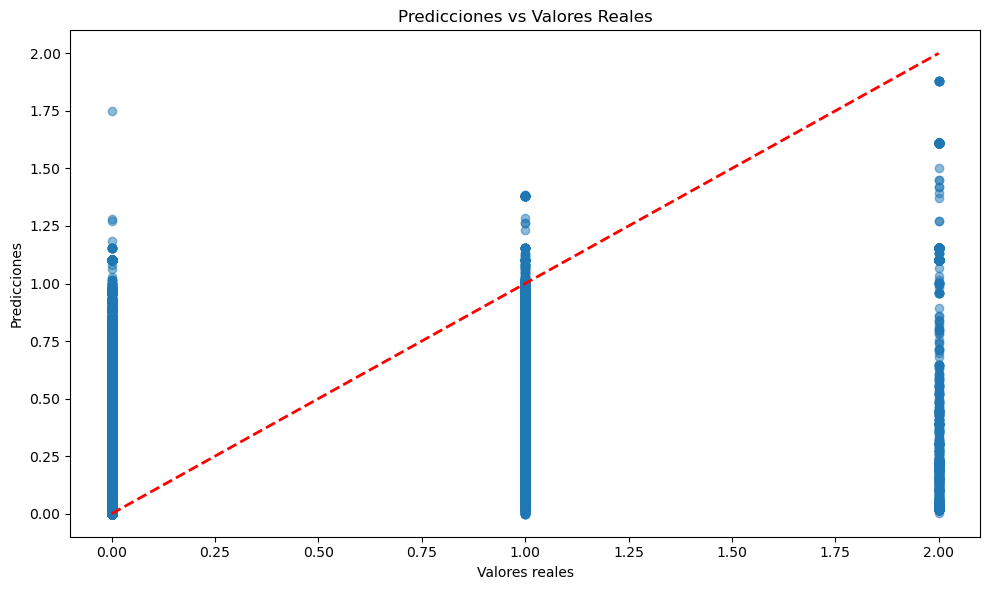

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import matplotlib.pyplot as plt

# Funciones auxiliares
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

# Leer el dataset
df = pd.read_csv("datasets/TotalFeatures-ISCXFlowMeter.csv")

# Convertir la columna 'calss' a valores numéricos
df['calss'], _ = pd.factorize(df['calss'])

# División del dataset
train_set, val_set, test_set = train_val_test_split(df)
X_train, y_train = remove_labels(train_set, 'calss')
X_val, y_val = remove_labels(val_set, 'calss')
X_test, y_test = remove_labels(test_set, 'calss')

# Escalado
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para mantener los nombres de las columnas
X_train_scaled = DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Regresión Forestal
rf_model = RandomForestRegressor(
    n_estimators=10,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Importancia de características
importancia = pd.DataFrame({
    'caracteristica': X_train.columns,
    'importancia': rf_model.feature_importances_
}).sort_values('importancia', ascending=False)

print("\nMétricas del modelo:")
print(f"Error cuadrático medio: {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print("\nImportancia de características:")
print(importancia)

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.tight_layout()
plt.show()
